In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  tensorflow import keras
from sklearn.model_selection import train_test_split

In [13]:
(train_data, train_labels), (test_data, test_labels) = keras.datasets.reuters.load_data(num_words=10000)
train_data

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [14]:
word_index = keras.datasets.reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [15]:
def vectorize(sequences,dim=10000):
    results = np.zeros((len(sequences),dim))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results


In [16]:
#vectorize the data
X_train = vectorize(train_data)
X_test = vectorize(test_data)
print('original:', train_data[0][:5])
print('vectorized:', X_train[0][:5])

original: [1, 2, 2, 8, 43]
vectorized: [0. 1. 1. 0. 1.]


In [17]:
# to categorical labels
y_train = keras.utils.to_categorical(train_labels)
y_test = keras.utils.to_categorical(test_labels)
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [18]:
# test-val split
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [19]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(
    optimizer= optimizers.SGD(lr=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy','Precision']
)

In [20]:
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/30


2023-03-24 19:15:08.074475: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 359280000 exceeds 10% of free system memory.


281/281 [==============================] - 8s 28ms/step - loss: 2.3475 - accuracy: 0.4981 - precision: 0.9402 - val_loss: 1.8443 - val_accuracy: 0.5539 - val_precision: 0.9217
Epoch 2/30
281/281 [==============================] - 7s 27ms/step - loss: 1.6600 - accuracy: 0.6102 - precision: 0.9312 - val_loss: 1.6151 - val_accuracy: 0.6376 - val_precision: 0.9184
Epoch 3/30
281/281 [==============================] - 8s 28ms/step - loss: 1.4706 - accuracy: 0.6679 - precision: 0.9258 - val_loss: 1.4800 - val_accuracy: 0.6785 - val_precision: 0.9341
Epoch 4/30
281/281 [==============================] - 8s 29ms/step - loss: 1.3412 - accuracy: 0.6965 - precision: 0.9255 - val_loss: 1.3829 - val_accuracy: 0.6928 - val_precision: 0.9250
Epoch 5/30
281/281 [==============================] - 8s 27ms/step - loss: 1.2419 - accuracy: 0.7196 - precision: 0.9241 - val_loss: 1.3133 - val_accuracy: 0.7133 - val_precision: 0.9221
Epoch 6/30
281/281 [==============================] - 8s 28ms/step - loss: 1

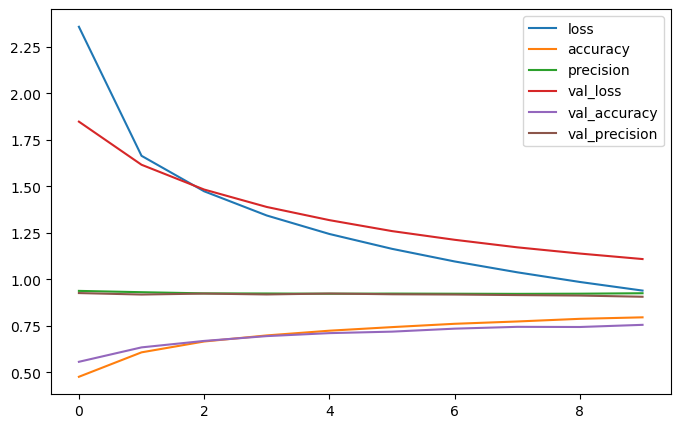

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.show()

In [ ]:
32*281,len(X_train)

(8992, 8982)